<a href="https://colab.research.google.com/github/DONIHSAN/Data-Mining/blob/main/Tugas_Pertemuan_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Eksplorasi Data


5 Baris Pertama:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0         

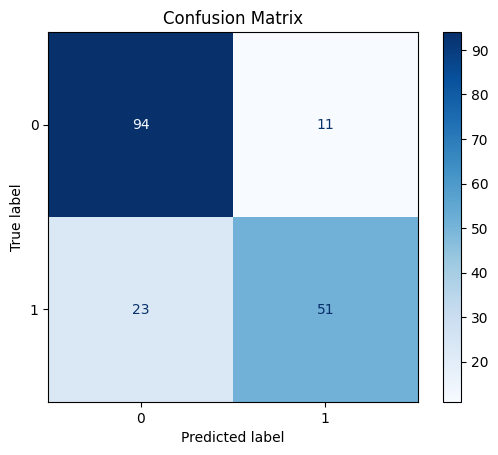

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Eksplorasi Data
print("1. Eksplorasi Data")
print("\n")

url = 'https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/refs/heads/main/dataset/titanic.csv'

df = pd.read_csv(url)
print("5 Baris Pertama:")
print(df.head())
print("\nInfo Data:")
print(df.info())
print("\nMissing Values per Kolom:")
print(df.isnull().sum())
print("\n")

# 2. Preprocessing
print("2. Preprocessing")
print("\n")
# Pilih fitur yang relevan
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# Identifikasi kolom numerik dan kategorikal
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Pclass', 'Sex', 'Embarked']

# Preprocessing pipeline
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])
print("\n")

# 3. Buat Pipeline Model
print("3. Buat Pipeline Model")
print("\n")
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])
print("\n")

# 4. GridSearchCV
print("4. GridSearchCV")
print("\n")
param_grid = {
    'clf': [RandomForestClassifier(random_state=42), LogisticRegression(max_iter=1000, random_state=42)],
    'clf__n_estimators': [50, 100],  # hanya untuk RandomForest
    'clf__max_depth': [3, 5, None],  # hanya untuk RandomForest
}
# Untuk LogisticRegression, param_grid harus disesuaikan, jadi kita split grid search dua kali:
param_grid_rf = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [3, 5, None],
    'clf': [RandomForestClassifier(random_state=42)]
}
param_grid_lr = {
    'clf': [LogisticRegression(max_iter=1000, random_state=42)],
    'clf__C': [0.1, 1, 10]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearch untuk RandomForest
gs_rf = GridSearchCV(pipe, param_grid_rf, cv=5, n_jobs=-1)
gs_rf.fit(X_train, y_train)
print("\nBest Params RandomForest:", gs_rf.best_params_)
print("Best Score RandomForest:", gs_rf.best_score_)

# GridSearch untuk LogisticRegression
gs_lr = GridSearchCV(pipe, param_grid_lr, cv=5, n_jobs=-1)
gs_lr.fit(X_train, y_train)
print("\nBest Params LogisticRegression:", gs_lr.best_params_)
print("Best Score LogisticRegression:", gs_lr.best_score_)

# Pilih model terbaik
if gs_rf.best_score_ > gs_lr.best_score_:
    best_model = gs_rf.best_estimator_
    print("\nMenggunakan RandomForestClassifier sebagai model terbaik.")
else:
    best_model = gs_lr.best_estimator_
    print("\nMenggunakan LogisticRegression sebagai model terbaik.")
print("\n")

# 5. Evaluasi
print("5. Evaluasi")
print("\n")
y_pred = best_model.predict(X_test)
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\n")

# 6. Visualisasi
print("6. Visualisasi")
print("\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()